index - Unique Identifier for each row

trans_date_trans_time - Transaction DateTime

cc_num - Credit Card Number of Customer

merchant - Merchant Name

category - Category of Merchant

amt - Amount of Transaction

first - First Name of Credit Card Holder

last - Last Name of Credit Card Holder

gender - Gender of Credit Card Holder

street - Street Address of Credit Card Holder

city - City of Credit Card Holder

state - State of Credit Card Holder

zip - Zip of Credit Card Holder

lat - Latitude Location of Credit Card Holder

long - Longitude Location of Credit Card Holder

city_pop - Credit Card Holder's City Population

job - Job of Credit Card Holder

dob - Date of Birth of Credit Card Holder

trans_num - Transaction Number

unix_time - UNIX Time of transaction

merch_lat - Latitude Location of Merchant

merch_long - Longitude Location of Merchant

is_fraud - Fraud Flag <--- Target Class

In [182]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2 as pg2
%matplotlib inline

In [183]:
conn = pg2.connect(database="Credit_Fraud_Database", user="postgres",
                  password="Spring2021")

In [184]:
cur = conn.cursor()

In [185]:
cur.execute("SELECT * FROM credit_data")

In [186]:
cur.fetchone()

(9757,
 datetime.datetime(2019, 1, 7, 0, 58, 19),
 3546674063249004,
 'fraud_Kuhn LLC',
 'misc_net',
 Decimal('3.81'),
 'Jordan',
 'May',
 'M',
 '1626 Susan Course',
 'Aledo',
 'TX',
 76008,
 Decimal('32.700400000000000'),
 Decimal('-97.603900000000000'),
 13602,
 'Optometrist',
 'afe54dfbfd6cabb6f67b2a7972823677',
 1325897899,
 Decimal('32.143561000000000'),
 Decimal('-96.734212000000000'),
 0,
 35)

In [187]:
data = cur.fetchall()

In [188]:
data

[(29500,
  datetime.datetime(2019, 1, 18, 12, 35, 34),
  4379260813815979609,
  'fraud_Schoen Ltd',
  'kids_pets',
  Decimal('42.93'),
  'Thomas',
  'Jenkins',
  'M',
  '93914 Gregory Via',
  'Oakland',
  'CA',
  94619,
  Decimal('37.787800000000000'),
  Decimal('-122.188400000000000'),
  381459,
  'Barista',
  'f26dfab3572f9595d8942f18329528cc',
  1326890134,
  Decimal('37.394400000000000'),
  Decimal('-121.237740000000000'),
  0,
  45),
 (42285,
  datetime.datetime(2019, 1, 26, 5, 17, 9),
  4538566639857,
  'fraud_Boyer PLC',
  'misc_pos',
  Decimal('1.09'),
  'Jerry',
  'Kelly',
  'M',
  '3539 Mckenzie Stream',
  'Fairview',
  'NJ',
  7022,
  Decimal('40.817000000000000'),
  Decimal('-74.000000000000000'),
  13835,
  'Programmer, multimedia',
  '05bc57c8095272d6ea74893e5fa89c69',
  1327555029,
  Decimal('41.699339000000000'),
  Decimal('-73.804369000000000'),
  0,
  52),
 (42371,
  datetime.datetime(2019, 1, 26, 7, 26, 35),
  4973530368125489546,
  'fraud_Zboncak Ltd',
  'food_dinin

In [189]:
df = pd.DataFrame(data, columns=["credit_id", "trans_date_time", "cc_num",
                                "merchant_name", "category_merchant", "amt",
                                "first_name", "last_name", "gender", "street_address",
                                "city", "us_state", "zip_code", "lat", "long",
                                "city_pop", "job", "trans_num",
                                "unix_time", "merch_lat", "merch_long",
                                "is_fraud", "age"])

In [190]:
df

,credit_id,trans_date_time,cc_num,merchant_name,category_merchant,amt,first_name,last_name,gender,street_address,...,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,29500,2019-01-18 12:35:34,4379260813815979609,fraud_Schoen Ltd,kids_pets,42.93,Thomas,Jenkins,M,93914 Gregory Via,...,37.787800000000000,-122.188400000000000,381459,Barista,f26dfab3572f9595d8942f18329528cc,1326890134,37.394400000000000,-121.237740000000000,0,45
1,42285,2019-01-26 05:17:09,4538566639857,fraud_Boyer PLC,misc_pos,1.09,Jerry,Kelly,M,3539 Mckenzie Stream,...,40.817000000000000,-74.000000000000000,13835,"Programmer, multimedia",05bc57c8095272d6ea74893e5fa89c69,1327555029,41.699339000000000,-73.804369000000000,0,52
2,42371,2019-01-26 07:26:35,4973530368125489546,fraud_Zboncak Ltd,food_dining,125.94,Mary,Rodriguez,F,8986 Fitzgerald Plains,...,35.831200000000000,-94.118700000000000,2786,Musician,5339bcd079b673bea44a2203c418100d,1327562795,35.084185999999995,-93.397746000000000,0,54
3,42424,2019-01-26 08:32:56,213178850083780,fraud_Kassulke PLC,shopping_net,100.37,Shawn,King,M,31493 Garcia Summit,...,45.828900000000000,-118.497100000000000,1302,Dealer,e25d95e4bcae9217e121936c9dcdcc24,1327566776,45.071580000000000,-119.176080000000000,0,43
4,42537,2019-01-26 10:39:59,2227671554547514,fraud_Brown PLC,misc_net,134.13,Angie,Jones,F,6970 Blake Trail,...,27.900400000000000,-82.715200000000000,172247,"Geneticist, molecular",e398cbfc72e92b25d7b96cb53fbf8b4a,1327574399,27.655373000000000,-83.103263000000000,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296669,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.717500000000000,-112.477700000000000,258,Geoscientist,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266000000000,-111.690764999999980,0,59
1296670,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.266700000000000,-77.510100000000000,100,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881000000000,-78.246528000000000,0,41
1296671,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.939600000000000,-105.818900000000000,899,Naval architect,483f52fe67fabef353d552c1e662974c,1371816752,33.619513000000000,-105.130529000000000,0,53
1296672,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.352600000000000,-102.541100000000000,1126,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940000000000,-103.241160000000000,0,40


In [191]:
df.columns

Index(['credit_id', 'trans_date_time', 'cc_num', 'merchant_name',
       'category_merchant', 'amt', 'first_name', 'last_name', 'gender',
       'street_address', 'city', 'us_state', 'zip_code', 'lat', 'long',
       'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age'],
      dtype='object')

In [192]:
df.describe()

,credit_id,cc_num,zip_code,city_pop,unix_time,is_fraud,age
count,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06
mean,6.483375e+05,4.171924e+17,4.880065e+04,8.882450e+04,1.349244e+09,5.788656e-03,4.602931e+01
std,3.743177e+05,1.308807e+18,2.689322e+04,3.019565e+05,1.284127e+07,7.586272e-02,1.738238e+01
min,0.000000e+00,6.041621e+10,1.257000e+03,2.300000e+01,1.325376e+09,0.000000e+00,1.400000e+01
25%,3.241692e+05,1.800429e+14,2.623700e+04,7.430000e+02,1.338751e+09,0.000000e+00,3.300000e+01
50%,6.483375e+05,3.521417e+15,4.817400e+04,2.456000e+03,1.349250e+09,0.000000e+00,4.400000e+01
75%,9.725058e+05,4.642255e+15,7.204200e+04,2.032800e+04,1.359385e+09,0.000000e+00,5.700000e+01
max,1.296674e+06,4.992346e+18,9.978300e+04,2.906700e+06,1.371817e+09,1.000000e+00,9.600000e+01


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296674 entries, 0 to 1296673
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   credit_id          1296674 non-null  int64         
 1   trans_date_time    1296674 non-null  datetime64[ns]
 2   cc_num             1296674 non-null  int64         
 3   merchant_name      1296674 non-null  object        
 4   category_merchant  1296674 non-null  object        
 5   amt                1296674 non-null  object        
 6   first_name         1296674 non-null  object        
 7   last_name          1296674 non-null  object        
 8   gender             1296674 non-null  object        
 9   street_address     1296674 non-null  object        
 10  city               1296674 non-null  object        
 11  us_state           1296674 non-null  object        
 12  zip_code           1296674 non-null  int64         
 13  lat                1296674 

<AxesSubplot:>

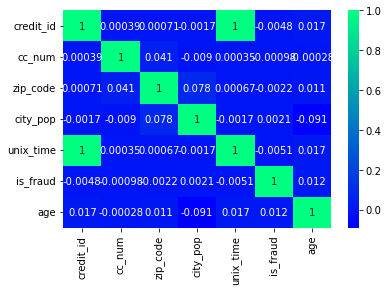

In [194]:

sns.heatmap(df.corr(), annot=True, cmap="winter")

In [195]:
df["amt"] = df["amt"].astype(float)

In [196]:
df["amt"]

0           42.93
1            1.09
2          125.94
3          100.37
4          134.13
            ...  
1296669     15.56
1296670     51.70
1296671    105.93
1296672     74.90
1296673      4.30
Name: amt, Length: 1296674, dtype: float64

In [197]:
df.corr()

,credit_id,cc_num,amt,zip_code,city_pop,unix_time,is_fraud,age
credit_id,1.000000,0.000385,-0.000252,0.000711,-0.001678,0.998971,-0.004768,0.016643
cc_num,0.000385,1.000000,0.001769,0.041459,-0.008991,0.000353,-0.000981,-0.000279
amt,-0.000252,0.001769,1.000000,0.001844,0.005818,-0.000294,0.219404,-0.009724
zip_code,0.000711,0.041459,0.001844,1.000000,0.078467,0.000672,-0.002162,0.011004
city_pop,-0.001678,-0.008991,0.005818,0.078467,1.000000,-0.001714,0.002136,-0.091295
unix_time,0.998971,0.000353,-0.000294,0.000672,-0.001714,1.000000,-0.005078,0.016706
is_fraud,-0.004768,-0.000981,0.219404,-0.002162,0.002136,-0.005078,1.000000,0.012453
age,0.016643,-0.000279,-0.009724,0.011004,-0.091295,0.016706,0.012453,1.000000


<AxesSubplot:>

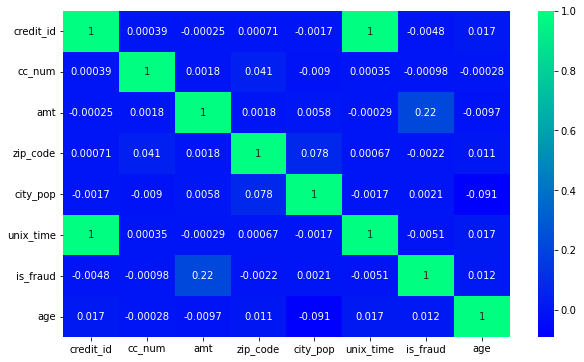

In [198]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="winter")

In [199]:
df["unix_time"]

0          1326890134
1          1327555029
2          1327562795
3          1327566776
4          1327574399
              ...    
1296669    1371816728
1296670    1371816739
1296671    1371816752
1296672    1371816816
1296673    1371816817
Name: unix_time, Length: 1296674, dtype: int64

In [200]:
df["credit_id"]

0            29500
1            42285
2            42371
3            42424
4            42537
            ...   
1296669    1296670
1296670    1296671
1296671    1296672
1296672    1296673
1296673    1296674
Name: credit_id, Length: 1296674, dtype: int64

In [201]:
df.describe()

,credit_id,cc_num,amt,zip_code,city_pop,unix_time,is_fraud,age
count,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06
mean,6.483375e+05,4.171924e+17,7.035109e+01,4.880065e+04,8.882450e+04,1.349244e+09,5.788656e-03,4.602931e+01
std,3.743177e+05,1.308807e+18,1.603161e+02,2.689322e+04,3.019565e+05,1.284127e+07,7.586272e-02,1.738238e+01
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.300000e+01,1.325376e+09,0.000000e+00,1.400000e+01
25%,3.241692e+05,1.800429e+14,9.650000e+00,2.623700e+04,7.430000e+02,1.338751e+09,0.000000e+00,3.300000e+01
50%,6.483375e+05,3.521417e+15,4.752000e+01,4.817400e+04,2.456000e+03,1.349250e+09,0.000000e+00,4.400000e+01
75%,9.725058e+05,4.642255e+15,8.314000e+01,7.204200e+04,2.032800e+04,1.359385e+09,0.000000e+00,5.700000e+01
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,2.906700e+06,1.371817e+09,1.000000e+00,9.600000e+01


<AxesSubplot:xlabel='amt', ylabel='Count'>

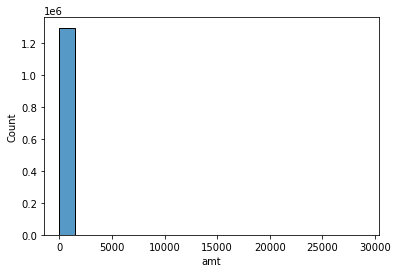

In [202]:
sns.histplot(x="amt", data=df, bins=20)

<AxesSubplot:xlabel='credit_id', ylabel='unix_time'>

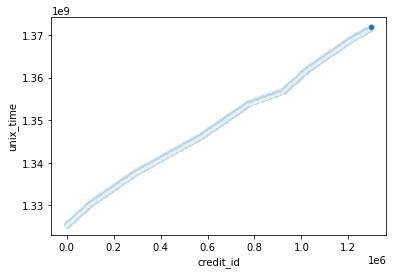

In [203]:
sns.scatterplot(x="credit_id", y="unix_time", data=df)

<AxesSubplot:xlabel='age', ylabel='Count'>

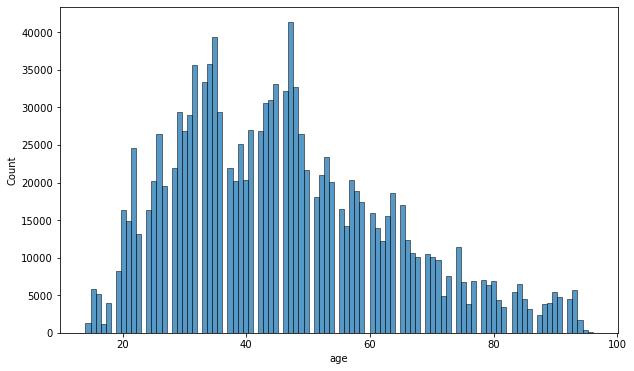

In [204]:
plt.figure(figsize=(10,6))
sns.histplot(x="age", data=df, bins=100)

In [205]:
df["age"]

0          45
1          52
2          54
3          43
4          40
           ..
1296669    59
1296670    41
1296671    53
1296672    40
1296673    25
Name: age, Length: 1296674, dtype: int64

In [206]:
df["age"].describe()

count    1.296674e+06
mean     4.602931e+01
std      1.738238e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

In [207]:
df["age"].groupby(df["is_fraud"])

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

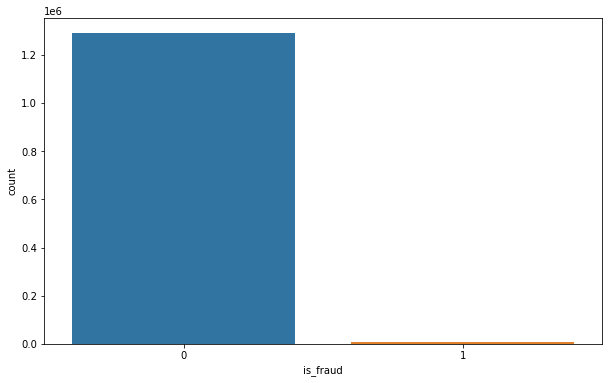

In [208]:
plt.figure(figsize=(10,6))
sns.countplot(x="is_fraud", data=df)

In [209]:
df.groupby("is_fraud")["amt"].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289168.0,67.667159,154.00802,1.00,9.6100,47.280,82.540,28948.90
1,7506.0,531.320092,390.56007,1.06,245.6625,396.505,900.875,1376.04


In [210]:
df.columns

Index(['credit_id', 'trans_date_time', 'cc_num', 'merchant_name',
       'category_merchant', 'amt', 'first_name', 'last_name', 'gender',
       'street_address', 'city', 'us_state', 'zip_code', 'lat', 'long',
       'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age'],
      dtype='object')

In [211]:
df["credit_id"]

0            29500
1            42285
2            42371
3            42424
4            42537
            ...   
1296669    1296670
1296670    1296671
1296671    1296672
1296672    1296673
1296673    1296674
Name: credit_id, Length: 1296674, dtype: int64

In [212]:
df["trans_date_time"].nunique()

1274790

In [213]:
df["credit_id"].nunique()

1296674

In [214]:
df["cc_num"].unique()

array([4379260813815979609,       4538566639857, 4973530368125489546,
           213178850083780,    2227671554547514,        584673555952,
          4939976756738216,    6011438889172900,    4060579726528237,
            30199621383748,     213155997615567,    3596217206093829,
          3593118134380341,    3586008444788268,      30026790933302,
       4045036286570100739, 4906628655840914250,    2356276337669917,
          3525590521269779,    3513618443244549,    6511349151405438,
           378858024506425,      30044330818990, 4715741951931168360,
             4066595222529,    3518758680062249,     180084576295055,
          4149238353975790,       4279161831637,    3506592072985012,
          4378993458389626,     374656033243756, 4890424426862856940,
          2266735643685262,    3560725013359375,    3598304579370089,
          4010002218955876,    6011542681743618,     347612609554823,
             4683638447911, 4646845581490336108,    4277232699798846,
       4792627764422

In [215]:
df["merchant_name"].nunique()

693

In [216]:
df["category_merchant"].nunique()

14

In [217]:
df["category_merchant"].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63286
grocery_net        45452
travel             40507
Name: category_merchant, dtype: int64

In [218]:
df["first_name"].nunique()

352

In [219]:
df["last_name"].nunique()

481

In [220]:
df["street_address"].nunique()

983

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

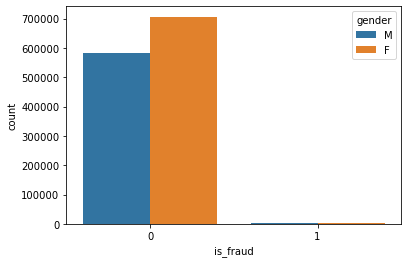

In [221]:
sns.countplot(x="is_fraud", hue="gender", data=df)

In [222]:
df.head().T

,0,1,2,3,4
credit_id,29500,42285,42371,42424,42537
trans_date_time,2019-01-18 12:35:34,2019-01-26 05:17:09,2019-01-26 07:26:35,2019-01-26 08:32:56,2019-01-26 10:39:59
cc_num,4379260813815979609,4538566639857,4973530368125489546,213178850083780,2227671554547514
merchant_name,fraud_Schoen Ltd,fraud_Boyer PLC,fraud_Zboncak Ltd,fraud_Kassulke PLC,fraud_Brown PLC
category_merchant,kids_pets,misc_pos,food_dining,shopping_net,misc_net
amt,42.93,1.09,125.94,100.37,134.13
first_name,Thomas,Jerry,Mary,Shawn,Angie
last_name,Jenkins,Kelly,Rodriguez,King,Jones
gender,M,M,F,M,F
street_address,93914 Gregory Via,3539 Mckenzie Stream,8986 Fitzgerald Plains,31493 Garcia Summit,6970 Blake Trail


In [223]:
df.corr()

,credit_id,cc_num,amt,zip_code,city_pop,unix_time,is_fraud,age
credit_id,1.000000,0.000385,-0.000252,0.000711,-0.001678,0.998971,-0.004768,0.016643
cc_num,0.000385,1.000000,0.001769,0.041459,-0.008991,0.000353,-0.000981,-0.000279
amt,-0.000252,0.001769,1.000000,0.001844,0.005818,-0.000294,0.219404,-0.009724
zip_code,0.000711,0.041459,0.001844,1.000000,0.078467,0.000672,-0.002162,0.011004
city_pop,-0.001678,-0.008991,0.005818,0.078467,1.000000,-0.001714,0.002136,-0.091295
unix_time,0.998971,0.000353,-0.000294,0.000672,-0.001714,1.000000,-0.005078,0.016706
is_fraud,-0.004768,-0.000981,0.219404,-0.002162,0.002136,-0.005078,1.000000,0.012453
age,0.016643,-0.000279,-0.009724,0.011004,-0.091295,0.016706,0.012453,1.000000


In [224]:
df["unix_time"]

0          1326890134
1          1327555029
2          1327562795
3          1327566776
4          1327574399
              ...    
1296669    1371816728
1296670    1371816739
1296671    1371816752
1296672    1371816816
1296673    1371816817
Name: unix_time, Length: 1296674, dtype: int64

In [225]:
df["trans_num"].nunique()

1296674

In [226]:
df.groupby("is_fraud")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289168.0,46.012789,17.372082,14.0,33.0,44.0,57.0,96.0
1,7506.0,48.866240,18.856058,14.0,33.0,48.0,61.0,94.0


In [227]:
df.head().T

,0,1,2,3,4
credit_id,29500,42285,42371,42424,42537
trans_date_time,2019-01-18 12:35:34,2019-01-26 05:17:09,2019-01-26 07:26:35,2019-01-26 08:32:56,2019-01-26 10:39:59
cc_num,4379260813815979609,4538566639857,4973530368125489546,213178850083780,2227671554547514
merchant_name,fraud_Schoen Ltd,fraud_Boyer PLC,fraud_Zboncak Ltd,fraud_Kassulke PLC,fraud_Brown PLC
category_merchant,kids_pets,misc_pos,food_dining,shopping_net,misc_net
amt,42.93,1.09,125.94,100.37,134.13
first_name,Thomas,Jerry,Mary,Shawn,Angie
last_name,Jenkins,Kelly,Rodriguez,King,Jones
gender,M,M,F,M,F
street_address,93914 Gregory Via,3539 Mckenzie Stream,8986 Fitzgerald Plains,31493 Garcia Summit,6970 Blake Trail


In [228]:
df["job"].value_counts()

Film,video editor                 9779
Exhibition designer               9199
Naval architect                   8684
Surveyor, land,geomatics          8680
Materials engineer                8270
                                  ... 
Information officer                  8
Armed forces technical officer       8
Warehouse manager                    7
Contracting civil engineer           7
Ship broker                          7
Name: job, Length: 494, dtype: int64

In [229]:
df["us_state"].value_counts()

TX    94875
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: us_state, dtype: int64

Adolescents: 14-17 years old

Young Adults: 18-29 years old

Middle-Aged Adults: 30-59 years old

Senior Adults: 60-79 years old

Elderly Adults: 80 years and above.

In [230]:
def age_range(age):
    if age >= 14 and age <= 17:
        return "Adolescents"
    elif age >= 18 and age <= 29:
        return "Young Adults"
    elif age >= 30 and age <= 59:
        return "Middle-Age Adults"
    elif age >= 60 and age <= 79:
        return "Senior Adults"
    else:
        return "Ederly Adults"

In [231]:
df["age"] = df["age"].apply(age_range)

In [232]:
df["age"].nunique()

5

In [233]:
dummies = pd.get_dummies(df["age"], drop_first=True)

df = pd.concat([df.drop("age", axis=1), dummies], axis=1)

In [234]:
df

,credit_id,trans_date_time,cc_num,merchant_name,category_merchant,amt,first_name,last_name,gender,street_address,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Ederly Adults,Middle-Age Adults,Senior Adults,Young Adults
0,29500,2019-01-18 12:35:34,4379260813815979609,fraud_Schoen Ltd,kids_pets,42.93,Thomas,Jenkins,M,93914 Gregory Via,...,Barista,f26dfab3572f9595d8942f18329528cc,1326890134,37.394400000000000,-121.237740000000000,0,0,1,0,0
1,42285,2019-01-26 05:17:09,4538566639857,fraud_Boyer PLC,misc_pos,1.09,Jerry,Kelly,M,3539 Mckenzie Stream,...,"Programmer, multimedia",05bc57c8095272d6ea74893e5fa89c69,1327555029,41.699339000000000,-73.804369000000000,0,0,1,0,0
2,42371,2019-01-26 07:26:35,4973530368125489546,fraud_Zboncak Ltd,food_dining,125.94,Mary,Rodriguez,F,8986 Fitzgerald Plains,...,Musician,5339bcd079b673bea44a2203c418100d,1327562795,35.084185999999995,-93.397746000000000,0,0,1,0,0
3,42424,2019-01-26 08:32:56,213178850083780,fraud_Kassulke PLC,shopping_net,100.37,Shawn,King,M,31493 Garcia Summit,...,Dealer,e25d95e4bcae9217e121936c9dcdcc24,1327566776,45.071580000000000,-119.176080000000000,0,0,1,0,0
4,42537,2019-01-26 10:39:59,2227671554547514,fraud_Brown PLC,misc_net,134.13,Angie,Jones,F,6970 Blake Trail,...,"Geneticist, molecular",e398cbfc72e92b25d7b96cb53fbf8b4a,1327574399,27.655373000000000,-83.103263000000000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296669,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,Geoscientist,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266000000000,-111.690764999999980,0,0,1,0,0
1296670,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881000000000,-78.246528000000000,0,0,1,0,0
1296671,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,Naval architect,483f52fe67fabef353d552c1e662974c,1371816752,33.619513000000000,-105.130529000000000,0,0,1,0,0
1296672,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940000000000,-103.241160000000000,0,0,1,0,0


In [235]:
df.head().T

,0,1,2,3,4
credit_id,29500,42285,42371,42424,42537
trans_date_time,2019-01-18 12:35:34,2019-01-26 05:17:09,2019-01-26 07:26:35,2019-01-26 08:32:56,2019-01-26 10:39:59
cc_num,4379260813815979609,4538566639857,4973530368125489546,213178850083780,2227671554547514
merchant_name,fraud_Schoen Ltd,fraud_Boyer PLC,fraud_Zboncak Ltd,fraud_Kassulke PLC,fraud_Brown PLC
category_merchant,kids_pets,misc_pos,food_dining,shopping_net,misc_net
amt,42.93,1.09,125.94,100.37,134.13
first_name,Thomas,Jerry,Mary,Shawn,Angie
last_name,Jenkins,Kelly,Rodriguez,King,Jones
gender,M,M,F,M,F
street_address,93914 Gregory Via,3539 Mckenzie Stream,8986 Fitzgerald Plains,31493 Garcia Summit,6970 Blake Trail


In [236]:
df["cc_num"]

0          4379260813815979609
1                4538566639857
2          4973530368125489546
3              213178850083780
4             2227671554547514
                  ...         
1296669         30263540414123
1296670       6011149206456997
1296671       3514865930894695
1296672       2720012583106919
1296673    4292902571056973207
Name: cc_num, Length: 1296674, dtype: int64

In [237]:
df.groupby("is_fraud")["cc_num"].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289168.0,4.172904e+17,1.308990e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
1,7506.0,4.003577e+17,1.276871e+18,6.041621e+10,1.800429e+14,3.528041e+15,4.651007e+15,4.992346e+18


In [238]:
df["zip_code"].nunique()

970

In [239]:
df.groupby("is_fraud")["zip_code"].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289168.0,48805.086380,26890.986769,1257.0,26237.0,48174.0,72042.0,99783.0
1,7506.0,48038.714229,27265.558212,1330.0,24927.0,46290.0,71107.0,99783.0


In [240]:
df.head().T

,0,1,2,3,4
credit_id,29500,42285,42371,42424,42537
trans_date_time,2019-01-18 12:35:34,2019-01-26 05:17:09,2019-01-26 07:26:35,2019-01-26 08:32:56,2019-01-26 10:39:59
cc_num,4379260813815979609,4538566639857,4973530368125489546,213178850083780,2227671554547514
merchant_name,fraud_Schoen Ltd,fraud_Boyer PLC,fraud_Zboncak Ltd,fraud_Kassulke PLC,fraud_Brown PLC
category_merchant,kids_pets,misc_pos,food_dining,shopping_net,misc_net
amt,42.93,1.09,125.94,100.37,134.13
first_name,Thomas,Jerry,Mary,Shawn,Angie
last_name,Jenkins,Kelly,Rodriguez,King,Jones
gender,M,M,F,M,F
street_address,93914 Gregory Via,3539 Mckenzie Stream,8986 Fitzgerald Plains,31493 Garcia Summit,6970 Blake Trail


In [241]:
dummies = pd.get_dummies(df["gender"], drop_first=True)

df = pd.concat([df.drop("gender", axis=1), dummies], axis=1)

In [242]:
df.head().T

,0,1,2,3,4
credit_id,29500,42285,42371,42424,42537
trans_date_time,2019-01-18 12:35:34,2019-01-26 05:17:09,2019-01-26 07:26:35,2019-01-26 08:32:56,2019-01-26 10:39:59
cc_num,4379260813815979609,4538566639857,4973530368125489546,213178850083780,2227671554547514
merchant_name,fraud_Schoen Ltd,fraud_Boyer PLC,fraud_Zboncak Ltd,fraud_Kassulke PLC,fraud_Brown PLC
category_merchant,kids_pets,misc_pos,food_dining,shopping_net,misc_net
amt,42.93,1.09,125.94,100.37,134.13
first_name,Thomas,Jerry,Mary,Shawn,Angie
last_name,Jenkins,Kelly,Rodriguez,King,Jones
street_address,93914 Gregory Via,3539 Mckenzie Stream,8986 Fitzgerald Plains,31493 Garcia Summit,6970 Blake Trail
city,Oakland,Fairview,Winslow,Athena,Clearwater


In [243]:
df["job"].nunique()

494

In [244]:
df.drop("credit_id", axis=1, inplace=True)

In [245]:
df

,trans_date_time,cc_num,merchant_name,category_merchant,amt,first_name,last_name,street_address,city,us_state,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,Ederly Adults,Middle-Age Adults,Senior Adults,Young Adults,M
0,2019-01-18 12:35:34,4379260813815979609,fraud_Schoen Ltd,kids_pets,42.93,Thomas,Jenkins,93914 Gregory Via,Oakland,CA,...,f26dfab3572f9595d8942f18329528cc,1326890134,37.394400000000000,-121.237740000000000,0,0,1,0,0,1
1,2019-01-26 05:17:09,4538566639857,fraud_Boyer PLC,misc_pos,1.09,Jerry,Kelly,3539 Mckenzie Stream,Fairview,NJ,...,05bc57c8095272d6ea74893e5fa89c69,1327555029,41.699339000000000,-73.804369000000000,0,0,1,0,0,1
2,2019-01-26 07:26:35,4973530368125489546,fraud_Zboncak Ltd,food_dining,125.94,Mary,Rodriguez,8986 Fitzgerald Plains,Winslow,AR,...,5339bcd079b673bea44a2203c418100d,1327562795,35.084185999999995,-93.397746000000000,0,0,1,0,0,0
3,2019-01-26 08:32:56,213178850083780,fraud_Kassulke PLC,shopping_net,100.37,Shawn,King,31493 Garcia Summit,Athena,OR,...,e25d95e4bcae9217e121936c9dcdcc24,1327566776,45.071580000000000,-119.176080000000000,0,0,1,0,0,1
4,2019-01-26 10:39:59,2227671554547514,fraud_Brown PLC,misc_net,134.13,Angie,Jones,6970 Blake Trail,Clearwater,FL,...,e398cbfc72e92b25d7b96cb53fbf8b4a,1327574399,27.655373000000000,-83.103263000000000,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296669,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,162 Jessica Row Apt. 072,Hatch,UT,...,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266000000000,-111.690764999999980,0,0,1,0,0,1
1296670,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,8617 Holmes Terrace Suite 651,Tuscarora,MD,...,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881000000000,-78.246528000000000,0,0,1,0,0,1
1296671,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,...,483f52fe67fabef353d552c1e662974c,1371816752,33.619513000000000,-105.130529000000000,0,0,1,0,0,1
1296672,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,42933 Ryan Underpass,Manderson,SD,...,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940000000000,-103.241160000000000,0,0,1,0,0,1


In [246]:
df["city"].nunique()

894

In [247]:
df.drop("unix_time", axis=1, inplace=True)

In [248]:
df.head().T

,0,1,2,3,4
trans_date_time,2019-01-18 12:35:34,2019-01-26 05:17:09,2019-01-26 07:26:35,2019-01-26 08:32:56,2019-01-26 10:39:59
cc_num,4379260813815979609,4538566639857,4973530368125489546,213178850083780,2227671554547514
merchant_name,fraud_Schoen Ltd,fraud_Boyer PLC,fraud_Zboncak Ltd,fraud_Kassulke PLC,fraud_Brown PLC
category_merchant,kids_pets,misc_pos,food_dining,shopping_net,misc_net
amt,42.93,1.09,125.94,100.37,134.13
first_name,Thomas,Jerry,Mary,Shawn,Angie
last_name,Jenkins,Kelly,Rodriguez,King,Jones
street_address,93914 Gregory Via,3539 Mckenzie Stream,8986 Fitzgerald Plains,31493 Garcia Summit,6970 Blake Trail
city,Oakland,Fairview,Winslow,Athena,Clearwater
us_state,CA,NJ,AR,OR,FL


In [249]:
df[df["long"] > -180]

,trans_date_time,cc_num,merchant_name,category_merchant,amt,first_name,last_name,street_address,city,us_state,...,job,trans_num,merch_lat,merch_long,is_fraud,Ederly Adults,Middle-Age Adults,Senior Adults,Young Adults,M
0,2019-01-18 12:35:34,4379260813815979609,fraud_Schoen Ltd,kids_pets,42.93,Thomas,Jenkins,93914 Gregory Via,Oakland,CA,...,Barista,f26dfab3572f9595d8942f18329528cc,37.394400000000000,-121.237740000000000,0,0,1,0,0,1
1,2019-01-26 05:17:09,4538566639857,fraud_Boyer PLC,misc_pos,1.09,Jerry,Kelly,3539 Mckenzie Stream,Fairview,NJ,...,"Programmer, multimedia",05bc57c8095272d6ea74893e5fa89c69,41.699339000000000,-73.804369000000000,0,0,1,0,0,1
2,2019-01-26 07:26:35,4973530368125489546,fraud_Zboncak Ltd,food_dining,125.94,Mary,Rodriguez,8986 Fitzgerald Plains,Winslow,AR,...,Musician,5339bcd079b673bea44a2203c418100d,35.084185999999995,-93.397746000000000,0,0,1,0,0,0
3,2019-01-26 08:32:56,213178850083780,fraud_Kassulke PLC,shopping_net,100.37,Shawn,King,31493 Garcia Summit,Athena,OR,...,Dealer,e25d95e4bcae9217e121936c9dcdcc24,45.071580000000000,-119.176080000000000,0,0,1,0,0,1
4,2019-01-26 10:39:59,2227671554547514,fraud_Brown PLC,misc_net,134.13,Angie,Jones,6970 Blake Trail,Clearwater,FL,...,"Geneticist, molecular",e398cbfc72e92b25d7b96cb53fbf8b4a,27.655373000000000,-83.103263000000000,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296669,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,162 Jessica Row Apt. 072,Hatch,UT,...,Geoscientist,440b587732da4dc1a6395aba5fb41669,36.841266000000000,-111.690764999999980,0,0,1,0,0,1
1296670,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,8617 Holmes Terrace Suite 651,Tuscarora,MD,...,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,38.906881000000000,-78.246528000000000,0,0,1,0,0,1
1296671,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,...,Naval architect,483f52fe67fabef353d552c1e662974c,33.619513000000000,-105.130529000000000,0,0,1,0,0,1
1296672,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,42933 Ryan Underpass,Manderson,SD,...,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,42.788940000000000,-103.241160000000000,0,0,1,0,0,1


Maximum longitude: 180 degrees East or West

Minimum longitude: -180 degrees East or West

Maximum latitude: 90 degrees North

Minimum latitude: -90 degrees South

In [250]:
df[df["is_fraud"] == 1]

,trans_date_time,cc_num,merchant_name,category_merchant,amt,first_name,last_name,street_address,city,us_state,...,job,trans_num,merch_lat,merch_long,is_fraud,Ederly Adults,Middle-Age Adults,Senior Adults,Young Adults,M
159,2019-03-05 22:00:30,4306630852918,fraud_Mohr-Bayer,shopping_net,1209.70,Maureen,Garza,169 Edward Inlet,Saint Louis,MO,...,Occupational hygienist,f59084927d5f05f44bd5149c3c345ad8,38.526279000000000,-90.269120000000000,1,0,1,0,0,0
704,2019-08-24 10:47:22,4939976756738216,fraud_Goyette Inc,shopping_net,1101.16,Michelle,Johnston,3531 Hamilton Highway,Roma,TX,...,IT trainer,d7256552cfb0189790a98ba4a0e3943f,26.734875000000000,-99.753218000000000,1,0,0,0,1,0
1103,2019-12-16 22:48:00,6011935564104173,fraud_Kozey-Boehm,shopping_net,1052.92,Robin,Davis,543 Mindy Oval,Dallas,TX,...,Architect,db226c68bf73acbee4e38efaa466d3de,33.477669000000000,-97.764909000000000,1,0,0,1,0,0
1144,2019-12-21 23:48:17,4158008602445,fraud_Streich Ltd,home,252.55,Alicia,Miller,976 Hubbard Lodge,Randolph,MN,...,Barrister,271dbe014f896b67781a4993b0ee802e,44.758793000000000,-92.441815000000000,1,0,1,0,0,0
1200,2019-12-29 22:31:10,4715741951931168360,fraud_Kihn Inc,shopping_pos,834.59,Robert,Drake,463 Willie Estates,Burbank,OK,...,Sub,05b5159803aeaec750243f54d44cd52d,36.646243000000000,-96.387263000000000,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295407,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,94225 Smith Springs Apt. 617,Vero Beach,FL,...,"Librarian, public",a83b093f0c1d9068fa0089f7c722615f,26.888686000000000,-80.834389000000000,1,0,1,0,0,0
1295498,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,94225 Smith Springs Apt. 617,Vero Beach,FL,...,"Librarian, public",f75b35bed13b9e692f170dba45a15b21,28.216707000000000,-79.855648000000000,1,0,1,0,0,0
1295539,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,458 Phillips Island Apt. 768,Denham Springs,LA,...,Herbalist,a0ba2472cd3fc9731f2a18d3f308f5c3,29.700456000000000,-91.361632000000000,1,0,0,0,1,1
1295673,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,63542 Luna Brook Apt. 012,Notrees,TX,...,Cytogeneticist,daa281350b1e16093c7b4bf97bf4d6ed,32.675272000000000,-103.484949000000000,1,0,1,0,0,0


In [251]:
df.drop(["first_name", "last_name"], axis=1, inplace=True)

In [252]:
df["year"] = df["trans_date_time"].dt.year

In [253]:
df

,trans_date_time,cc_num,merchant_name,category_merchant,amt,street_address,city,us_state,zip_code,lat,...,trans_num,merch_lat,merch_long,is_fraud,Ederly Adults,Middle-Age Adults,Senior Adults,Young Adults,M,year
0,2019-01-18 12:35:34,4379260813815979609,fraud_Schoen Ltd,kids_pets,42.93,93914 Gregory Via,Oakland,CA,94619,37.787800000000000,...,f26dfab3572f9595d8942f18329528cc,37.394400000000000,-121.237740000000000,0,0,1,0,0,1,2019
1,2019-01-26 05:17:09,4538566639857,fraud_Boyer PLC,misc_pos,1.09,3539 Mckenzie Stream,Fairview,NJ,7022,40.817000000000000,...,05bc57c8095272d6ea74893e5fa89c69,41.699339000000000,-73.804369000000000,0,0,1,0,0,1,2019
2,2019-01-26 07:26:35,4973530368125489546,fraud_Zboncak Ltd,food_dining,125.94,8986 Fitzgerald Plains,Winslow,AR,72959,35.831200000000000,...,5339bcd079b673bea44a2203c418100d,35.084185999999995,-93.397746000000000,0,0,1,0,0,0,2019
3,2019-01-26 08:32:56,213178850083780,fraud_Kassulke PLC,shopping_net,100.37,31493 Garcia Summit,Athena,OR,97813,45.828900000000000,...,e25d95e4bcae9217e121936c9dcdcc24,45.071580000000000,-119.176080000000000,0,0,1,0,0,1,2019
4,2019-01-26 10:39:59,2227671554547514,fraud_Brown PLC,misc_net,134.13,6970 Blake Trail,Clearwater,FL,33760,27.900400000000000,...,e398cbfc72e92b25d7b96cb53fbf8b4a,27.655373000000000,-83.103263000000000,0,0,1,0,0,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296669,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,162 Jessica Row Apt. 072,Hatch,UT,84735,37.717500000000000,...,440b587732da4dc1a6395aba5fb41669,36.841266000000000,-111.690764999999980,0,0,1,0,0,1,2020
1296670,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.266700000000000,...,278000d2e0d2277d1de2f890067dcc0a,38.906881000000000,-78.246528000000000,0,0,1,0,0,1,2020
1296671,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.939600000000000,...,483f52fe67fabef353d552c1e662974c,33.619513000000000,-105.130529000000000,0,0,1,0,0,1,2020
1296672,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,42933 Ryan Underpass,Manderson,SD,57756,43.352600000000000,...,d667cdcbadaaed3da3f4020e83591c83,42.788940000000000,-103.241160000000000,0,0,1,0,0,1,2020


In [254]:
df["cc_num"] = df["cc_num"].astype(str)

In [255]:
df["cc_num"].apply(len).nunique()

7

In [256]:
df["len_cc_num"] = df["cc_num"].apply(len)

In [257]:
df

,trans_date_time,cc_num,merchant_name,category_merchant,amt,street_address,city,us_state,zip_code,lat,...,merch_lat,merch_long,is_fraud,Ederly Adults,Middle-Age Adults,Senior Adults,Young Adults,M,year,len_cc_num
0,2019-01-18 12:35:34,4379260813815979609,fraud_Schoen Ltd,kids_pets,42.93,93914 Gregory Via,Oakland,CA,94619,37.787800000000000,...,37.394400000000000,-121.237740000000000,0,0,1,0,0,1,2019,19
1,2019-01-26 05:17:09,4538566639857,fraud_Boyer PLC,misc_pos,1.09,3539 Mckenzie Stream,Fairview,NJ,7022,40.817000000000000,...,41.699339000000000,-73.804369000000000,0,0,1,0,0,1,2019,13
2,2019-01-26 07:26:35,4973530368125489546,fraud_Zboncak Ltd,food_dining,125.94,8986 Fitzgerald Plains,Winslow,AR,72959,35.831200000000000,...,35.084185999999995,-93.397746000000000,0,0,1,0,0,0,2019,19
3,2019-01-26 08:32:56,213178850083780,fraud_Kassulke PLC,shopping_net,100.37,31493 Garcia Summit,Athena,OR,97813,45.828900000000000,...,45.071580000000000,-119.176080000000000,0,0,1,0,0,1,2019,15
4,2019-01-26 10:39:59,2227671554547514,fraud_Brown PLC,misc_net,134.13,6970 Blake Trail,Clearwater,FL,33760,27.900400000000000,...,27.655373000000000,-83.103263000000000,0,0,1,0,0,0,2019,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296669,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,162 Jessica Row Apt. 072,Hatch,UT,84735,37.717500000000000,...,36.841266000000000,-111.690764999999980,0,0,1,0,0,1,2020,14
1296670,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.266700000000000,...,38.906881000000000,-78.246528000000000,0,0,1,0,0,1,2020,16
1296671,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.939600000000000,...,33.619513000000000,-105.130529000000000,0,0,1,0,0,1,2020,16
1296672,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,42933 Ryan Underpass,Manderson,SD,57756,43.352600000000000,...,42.788940000000000,-103.241160000000000,0,0,1,0,0,1,2020,16


<AxesSubplot:xlabel='len_cc_num', ylabel='count'>

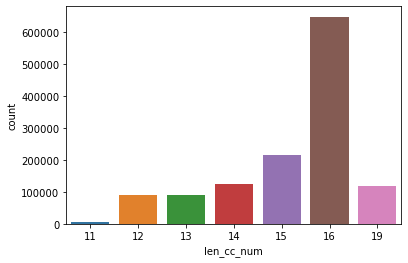

In [258]:
sns.countplot(x="len_cc_num", data=df)

In [259]:
df.groupby("is_fraud")["len_cc_num"].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289168.0,15.401929,1.699118,11.0,15.0,16.0,16.0,19.0
1,7506.0,15.386890,1.725942,11.0,15.0,16.0,16.0,19.0


In [260]:
df.groupby("is_fraud")["amt"].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289168.0,67.667159,154.00802,1.00,9.6100,47.280,82.540,28948.90
1,7506.0,531.320092,390.56007,1.06,245.6625,396.505,900.875,1376.04


In [261]:
df["category_merchant"].nunique()

14

In [262]:
dummies= pd.get_dummies(df["category_merchant"], drop_first=True)

df = pd.concat([df.drop("category_merchant", axis=1), dummies], axis=1)

In [263]:
df

,trans_date_time,cc_num,merchant_name,amt,street_address,city,us_state,zip_code,lat,long,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,2019-01-18 12:35:34,4379260813815979609,fraud_Schoen Ltd,42.93,93914 Gregory Via,Oakland,CA,94619,37.787800000000000,-122.188400000000000,...,0,0,0,1,0,0,0,0,0,0
1,2019-01-26 05:17:09,4538566639857,fraud_Boyer PLC,1.09,3539 Mckenzie Stream,Fairview,NJ,7022,40.817000000000000,-74.000000000000000,...,0,0,0,0,0,1,0,0,0,0
2,2019-01-26 07:26:35,4973530368125489546,fraud_Zboncak Ltd,125.94,8986 Fitzgerald Plains,Winslow,AR,72959,35.831200000000000,-94.118700000000000,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-26 08:32:56,213178850083780,fraud_Kassulke PLC,100.37,31493 Garcia Summit,Athena,OR,97813,45.828900000000000,-118.497100000000000,...,0,0,0,0,0,0,0,1,0,0
4,2019-01-26 10:39:59,2227671554547514,fraud_Brown PLC,134.13,6970 Blake Trail,Clearwater,FL,33760,27.900400000000000,-82.715200000000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296669,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,162 Jessica Row Apt. 072,Hatch,UT,84735,37.717500000000000,-112.477700000000000,...,0,0,0,0,0,0,0,0,0,0
1296670,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.266700000000000,-77.510100000000000,...,0,0,0,0,0,0,0,0,0,0
1296671,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.939600000000000,-105.818900000000000,...,0,0,0,0,0,0,0,0,0,0
1296672,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,42933 Ryan Underpass,Manderson,SD,57756,43.352600000000000,-102.541100000000000,...,0,0,0,0,0,0,0,0,0,0


In [264]:
df.drop("us_state", axis=1, inplace=True)

In [265]:
df.drop("trans_date_time", axis=1, inplace=True)

In [266]:
df

,cc_num,merchant_name,amt,street_address,city,zip_code,lat,long,city_pop,job,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4379260813815979609,fraud_Schoen Ltd,42.93,93914 Gregory Via,Oakland,94619,37.787800000000000,-122.188400000000000,381459,Barista,...,0,0,0,1,0,0,0,0,0,0
1,4538566639857,fraud_Boyer PLC,1.09,3539 Mckenzie Stream,Fairview,7022,40.817000000000000,-74.000000000000000,13835,"Programmer, multimedia",...,0,0,0,0,0,1,0,0,0,0
2,4973530368125489546,fraud_Zboncak Ltd,125.94,8986 Fitzgerald Plains,Winslow,72959,35.831200000000000,-94.118700000000000,2786,Musician,...,0,0,0,0,0,0,0,0,0,0
3,213178850083780,fraud_Kassulke PLC,100.37,31493 Garcia Summit,Athena,97813,45.828900000000000,-118.497100000000000,1302,Dealer,...,0,0,0,0,0,0,0,1,0,0
4,2227671554547514,fraud_Brown PLC,134.13,6970 Blake Trail,Clearwater,33760,27.900400000000000,-82.715200000000000,172247,"Geneticist, molecular",...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296669,30263540414123,fraud_Reichel Inc,15.56,162 Jessica Row Apt. 072,Hatch,84735,37.717500000000000,-112.477700000000000,258,Geoscientist,...,0,0,0,0,0,0,0,0,0,0
1296670,6011149206456997,fraud_Abernathy and Sons,51.70,8617 Holmes Terrace Suite 651,Tuscarora,21790,39.266700000000000,-77.510100000000000,100,"Production assistant, television",...,0,0,0,0,0,0,0,0,0,0
1296671,3514865930894695,fraud_Stiedemann Ltd,105.93,1632 Cohen Drive Suite 639,High Rolls Mountain Park,88325,32.939600000000000,-105.818900000000000,899,Naval architect,...,0,0,0,0,0,0,0,0,0,0
1296672,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,42933 Ryan Underpass,Manderson,57756,43.352600000000000,-102.541100000000000,1126,Volunteer coordinator,...,0,0,0,0,0,0,0,0,0,0


In [267]:
df["city"].nunique()

894

In [268]:
df["zip_code"].nunique()

970

In [269]:
df.drop(["cc_num", "merchant_name", "street_address", "city", "zip_code"], axis=1, inplace=True)

In [270]:
df

,amt,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,Ederly Adults,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,42.93,37.787800000000000,-122.188400000000000,381459,Barista,f26dfab3572f9595d8942f18329528cc,37.394400000000000,-121.237740000000000,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.09,40.817000000000000,-74.000000000000000,13835,"Programmer, multimedia",05bc57c8095272d6ea74893e5fa89c69,41.699339000000000,-73.804369000000000,0,0,...,0,0,0,0,0,1,0,0,0,0
2,125.94,35.831200000000000,-94.118700000000000,2786,Musician,5339bcd079b673bea44a2203c418100d,35.084185999999995,-93.397746000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100.37,45.828900000000000,-118.497100000000000,1302,Dealer,e25d95e4bcae9217e121936c9dcdcc24,45.071580000000000,-119.176080000000000,0,0,...,0,0,0,0,0,0,0,1,0,0
4,134.13,27.900400000000000,-82.715200000000000,172247,"Geneticist, molecular",e398cbfc72e92b25d7b96cb53fbf8b4a,27.655373000000000,-83.103263000000000,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296669,15.56,37.717500000000000,-112.477700000000000,258,Geoscientist,440b587732da4dc1a6395aba5fb41669,36.841266000000000,-111.690764999999980,0,0,...,0,0,0,0,0,0,0,0,0,0
1296670,51.70,39.266700000000000,-77.510100000000000,100,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,38.906881000000000,-78.246528000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1296671,105.93,32.939600000000000,-105.818900000000000,899,Naval architect,483f52fe67fabef353d552c1e662974c,33.619513000000000,-105.130529000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1296672,74.90,43.352600000000000,-102.541100000000000,1126,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,42.788940000000000,-103.241160000000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
df["job"].nunique()

494

In [272]:
df.drop("job", axis=1, inplace=True)

In [273]:
df

,amt,lat,long,city_pop,trans_num,merch_lat,merch_long,is_fraud,Ederly Adults,Middle-Age Adults,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,42.93,37.787800000000000,-122.188400000000000,381459,f26dfab3572f9595d8942f18329528cc,37.394400000000000,-121.237740000000000,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1.09,40.817000000000000,-74.000000000000000,13835,05bc57c8095272d6ea74893e5fa89c69,41.699339000000000,-73.804369000000000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,125.94,35.831200000000000,-94.118700000000000,2786,5339bcd079b673bea44a2203c418100d,35.084185999999995,-93.397746000000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,100.37,45.828900000000000,-118.497100000000000,1302,e25d95e4bcae9217e121936c9dcdcc24,45.071580000000000,-119.176080000000000,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,134.13,27.900400000000000,-82.715200000000000,172247,e398cbfc72e92b25d7b96cb53fbf8b4a,27.655373000000000,-83.103263000000000,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296669,15.56,37.717500000000000,-112.477700000000000,258,440b587732da4dc1a6395aba5fb41669,36.841266000000000,-111.690764999999980,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1296670,51.70,39.266700000000000,-77.510100000000000,100,278000d2e0d2277d1de2f890067dcc0a,38.906881000000000,-78.246528000000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1296671,105.93,32.939600000000000,-105.818900000000000,899,483f52fe67fabef353d552c1e662974c,33.619513000000000,-105.130529000000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1296672,74.90,43.352600000000000,-102.541100000000000,1126,d667cdcbadaaed3da3f4020e83591c83,42.788940000000000,-103.241160000000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296674 entries, 0 to 1296673
Data columns (total 28 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   amt                1296674 non-null  float64
 1   lat                1296674 non-null  object 
 2   long               1296674 non-null  object 
 3   city_pop           1296674 non-null  int64  
 4   trans_num          1296674 non-null  object 
 5   merch_lat          1296674 non-null  object 
 6   merch_long         1296674 non-null  object 
 7   is_fraud           1296674 non-null  int64  
 8   Ederly Adults      1296674 non-null  uint8  
 9   Middle-Age Adults  1296674 non-null  uint8  
 10  Senior Adults      1296674 non-null  uint8  
 11  Young Adults       1296674 non-null  uint8  
 12  M                  1296674 non-null  uint8  
 13  year               1296674 non-null  int64  
 14  len_cc_num         1296674 non-null  int64  
 15  food_dining        1296674 non-n

In [275]:
df["lat"] = df["lat"].astype(int)
df["long"] = df["long"].astype(int)

In [276]:
df.drop("trans_num", axis=1, inplace=True)
df["merch_lat"] = df["merch_lat"].astype(int)
df["merch_long"] = df["merch_long"].astype(int)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296674 entries, 0 to 1296673
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   amt                1296674 non-null  float64
 1   lat                1296674 non-null  int64  
 2   long               1296674 non-null  int64  
 3   city_pop           1296674 non-null  int64  
 4   merch_lat          1296674 non-null  int64  
 5   merch_long         1296674 non-null  int64  
 6   is_fraud           1296674 non-null  int64  
 7   Ederly Adults      1296674 non-null  uint8  
 8   Middle-Age Adults  1296674 non-null  uint8  
 9   Senior Adults      1296674 non-null  uint8  
 10  Young Adults       1296674 non-null  uint8  
 11  M                  1296674 non-null  uint8  
 12  year               1296674 non-null  int64  
 13  len_cc_num         1296674 non-null  int64  
 14  food_dining        1296674 non-null  uint8  
 15  gas_transport      1296674 non-n

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [279]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [280]:
model = RandomForestClassifier()


In [281]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [282]:
model = RandomForestClassifier()

In [283]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [284]:
y_preds = model.predict(X_test)

In [285]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    515652
           1       0.84      0.65      0.73      3018

    accuracy                           1.00    518670
   macro avg       0.92      0.82      0.87    518670
weighted avg       1.00      1.00      1.00    518670



In [286]:
test_data = pd.read_csv("testData.csv", index_col=0)

In [288]:
test_data.drop("state", axis=1, inplace=True)

In [289]:
test_data.drop("Unnamed: 0", axis=1, inplace=True)

In [290]:
test_data["job"] = test_data["job"].str.replace("/", ",")

In [291]:
test_data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [292]:
test_data.drop(["merchant", "first", "last", "street", "city", "job", "unix_time"], axis=1, inplace=True)

In [293]:
test_data

,trans_date_trans_time,cc_num,category,amt,gender,zip,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,29209,33.9659,-80.9355,333497,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,84002,40.3207,-110.4360,302,1990-01-17,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,11710,40.6729,-73.5365,34496,1970-10-21,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,32780,28.5697,-80.8191,54767,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,49632,44.2529,-85.0170,1126,1955-07-06,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,63453,40.4931,-91.8912,519,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,travel,7.99,M,83643,44.6255,-116.4493,129,1965-12-15,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,0


In [294]:
test_data["trans_date_trans_time"] = pd.DatetimeIndex(test_data["trans_date_trans_time"]).year

In [295]:
test_data["dob"] = pd.DatetimeIndex(test_data["dob"]).year

In [296]:
test_data["age"] = test_data["trans_date_trans_time"] - test_data["dob"]

In [297]:
test_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
category                 0
amt                      0
gender                   0
zip                      0
lat                      0
long                     0
city_pop                 0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
age                      0
dtype: int64

In [298]:
test_data.drop("trans_date_trans_time", axis=1, inplace=True)

In [299]:
test_data["category"].nunique()

14

In [300]:
dummies = pd.get_dummies(test_data["category"], drop_first=True)

test_data = pd.concat([test_data.drop("category", axis=1), dummies], axis=1)

In [301]:
dummies = pd.get_dummies(test_data["gender"], drop_first=True)

test_data = pd.concat([test_data.drop("gender", axis=1), dummies], axis=1)

In [302]:
test_data

,cc_num,amt,zip,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,M
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1968,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,...,0,0,0,0,0,1,0,0,0,1
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1990,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,...,0,0,0,0,0,1,0,0,0,0
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1970,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,...,1,0,0,0,0,0,0,0,0,0
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1987,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,...,0,0,0,0,1,0,0,0,0,1
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1955,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1966,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,...,1,0,0,0,0,0,0,0,0,1
555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1999,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,...,0,0,1,0,0,0,0,0,0,1
555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1981,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,...,0,0,1,0,0,0,0,0,0,0
555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1965,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,...,0,0,0,0,0,0,0,0,1,1


In [303]:
test_data.drop("zip", axis=1, inplace=True)

In [305]:
test_data

,cc_num,amt,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,M
0,2291163933867244,2.86,33.9659,-80.9355,333497,1968,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,...,0,0,0,0,0,1,0,0,0,1
1,3573030041201292,29.84,40.3207,-110.4360,302,1990,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,...,0,0,0,0,0,1,0,0,0,0
2,3598215285024754,41.28,40.6729,-73.5365,34496,1970,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,...,1,0,0,0,0,0,0,0,0,0
3,3591919803438423,60.05,28.5697,-80.8191,54767,1987,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,...,0,0,0,0,1,0,0,0,0,1
4,3526826139003047,3.19,44.2529,-85.0170,1126,1955,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,519,1966,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0,...,1,0,0,0,0,0,0,0,0,1
555715,3556613125071656,111.84,29.0393,-95.4401,28739,1999,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0,...,0,0,1,0,0,0,0,0,0,1
555716,6011724471098086,86.88,46.1966,-118.9017,3684,1981,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,...,0,0,1,0,0,0,0,0,0,0
555717,4079773899158,7.99,44.6255,-116.4493,129,1965,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,0,...,0,0,0,0,0,0,0,0,1,1


In [306]:
test_data["age"] = test_data["age"].apply(age_range)

In [307]:
dummies = pd.get_dummies(test_data["age"], drop_first=True)

test_data = pd.concat([test_data.drop("age", axis=1), dummies], axis=1)

In [308]:
test_data.drop("trans_num", axis=1, inplace=True)

In [309]:
test_data.drop("dob", axis=1, inplace=True)

In [310]:
test_data

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,food_dining,gas_transport,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,M,Ederly Adults,Middle-Age Adults,Senior Adults,Young Adults
0,2291163933867244,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,3573030041201292,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3598215285024754,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3591919803438423,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,3526826139003047,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,0,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,519,39.946837,-91.333331,0,0,0,...,0,0,0,0,0,1,0,1,0,0
555715,3556613125071656,111.84,29.0393,-95.4401,28739,29.661049,-96.186633,0,0,0,...,0,0,0,0,0,1,0,0,0,1
555716,6011724471098086,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0,0,0,...,0,0,0,0,0,0,0,1,0,0
555717,4079773899158,7.99,44.6255,-116.4493,129,44.470525,-117.080888,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [311]:
test_data

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,food_dining,gas_transport,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,M,Ederly Adults,Middle-Age Adults,Senior Adults,Young Adults
0,2291163933867244,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,3573030041201292,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3598215285024754,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3591919803438423,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,3526826139003047,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,0,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,519,39.946837,-91.333331,0,0,0,...,0,0,0,0,0,1,0,1,0,0
555715,3556613125071656,111.84,29.0393,-95.4401,28739,29.661049,-96.186633,0,0,0,...,0,0,0,0,0,1,0,0,0,1
555716,6011724471098086,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0,0,0,...,0,0,0,0,0,0,0,1,0,0
555717,4079773899158,7.99,44.6255,-116.4493,129,44.470525,-117.080888,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [312]:
test_data["len_cc_num"] = test_data["cc_num"].astype(str).apply(len)

In [313]:
test_data

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,food_dining,gas_transport,...,personal_care,shopping_net,shopping_pos,travel,M,Ederly Adults,Middle-Age Adults,Senior Adults,Young Adults,len_cc_num
0,2291163933867244,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,0,0,...,1,0,0,0,1,0,1,0,0,16
1,3573030041201292,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,0,0,...,1,0,0,0,0,0,1,0,0,16
2,3598215285024754,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,0,0,...,0,0,0,0,0,0,1,0,0,16
3,3591919803438423,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0,0,0,...,0,0,0,0,1,0,1,0,0,16
4,3526826139003047,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,0,0,...,0,0,0,1,1,0,0,1,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,519,39.946837,-91.333331,0,0,0,...,0,0,0,0,1,0,1,0,0,14
555715,3556613125071656,111.84,29.0393,-95.4401,28739,29.661049,-96.186633,0,0,0,...,0,0,0,0,1,0,0,0,1,16
555716,6011724471098086,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0,0,0,...,0,0,0,0,0,0,1,0,0,16
555717,4079773899158,7.99,44.6255,-116.4493,129,44.470525,-117.080888,0,0,0,...,0,0,0,1,1,0,1,0,0,13


In [314]:
test_data.drop("cc_num", axis=1, inplace=True)

In [315]:
test_data.columns

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'food_dining', 'gas_transport', 'grocery_net', 'grocery_pos',
       'health_fitness', 'home', 'kids_pets', 'misc_net', 'misc_pos',
       'personal_care', 'shopping_net', 'shopping_pos', 'travel', 'M',
       'Ederly Adults', 'Middle-Age Adults', 'Senior Adults', 'Young Adults',
       'len_cc_num'],
      dtype='object')

In [318]:
test_data

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,food_dining,gas_transport,grocery_net,...,personal_care,shopping_net,shopping_pos,travel,M,Ederly Adults,Middle-Age Adults,Senior Adults,Young Adults,len_cc_num
0,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,0,0,0,...,1,0,0,0,1,0,1,0,0,16
1,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,0,0,0,...,1,0,0,0,0,0,1,0,0,16
2,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16
3,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0,0,0,0,...,0,0,0,0,1,0,1,0,0,16
4,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,0,0,0,...,0,0,0,1,1,0,0,1,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,40.4931,-91.8912,519,39.946837,-91.333331,0,0,0,0,...,0,0,0,0,1,0,1,0,0,14
555715,111.84,29.0393,-95.4401,28739,29.661049,-96.186633,0,0,0,0,...,0,0,0,0,1,0,0,0,1,16
555716,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16
555717,7.99,44.6255,-116.4493,129,44.470525,-117.080888,0,0,0,0,...,0,0,0,1,1,0,1,0,0,13


In [319]:
X_train = df.drop("is_fraud", axis=1)
y_train = df["is_fraud"]

model.fit(X_train, y_train)

RandomForestClassifier()

In [323]:
X_test = test_data.drop("is_fraud", axis=1)
y_test = test_data["is_fraud"]

In [324]:
y_preds = model.predict(X_test)

/Users/redbean/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [325]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.00      0.01      0.00      2145

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719

